In [1]:
using Pkg
Pkg.activate("..")
#Pkg.develop(["Equilibrium", "IMAS"])
using Revise
using FUSE
using FUSE.IMAS

  Activating environment at `~/.julia/dev/FUSE/Project.toml`


In [5]:
ϵ = 0.32
κ = 1.7
δ = 0.33
R0 = 6.2
B0 = 5.3
ip = 15.E6
beta_n = 12.0

resolution = 33

dd=IMAS.dd()
FUSE.init(dd.equilibrium, 0.0; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=false)

eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium, 0.0, alpha=0, qstar=1.5)
@time FUSE.step(eqactor)
dd.equilibrium = FUSE.finalize(eqactor, resolution)

eqt = dd.equilibrium.time_slice[1];

  0.387240 seconds (5.94 M allocations: 330.171 MiB, 16.16% gc time)


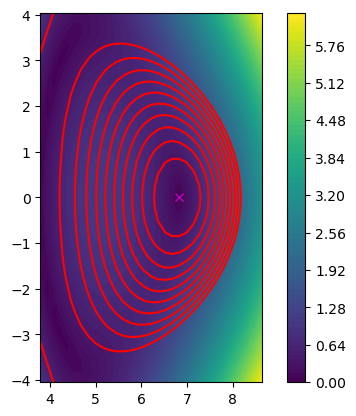

In [6]:
using PyPlot
Bp=sqrt.(eqt.profiles_2d[1].b_field_z.^2.0.+eqt.profiles_2d[1].b_field_r.^2.0)

PyPlot.figure()
CS=PyPlot.contour(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
    transpose(eqt.profiles_2d[1].psi),levels=sort(range(eqt.profiles_1d.psi[1],eqt.profiles_1d.psi[end],length=11)),colors="r")
CS=PyPlot.contourf(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
               transpose(Bp),levels=100)
#PyPlot.scatter(eqt.profiles_2d[1].grid.dim1'.*ones(n),ones(n)'.*eqt.profiles_2d[1].grid.dim2,marker=".",color="r")
PyPlot.plot(eqt.global_quantities.magnetic_axis.r,eqt.global_quantities.magnetic_axis.z,"mx")
PyPlot.gca().set_aspect("equal")
PyPlot.colorbar(CS);

  2.891298 seconds (26.07 M allocations: 1.028 GiB, 5.67% gc time, 0.20% compilation time)
513
  0.689015 seconds (6.95 M allocations: 286.657 MiB, 5.01% gc time)
257
  0.203464 seconds (2.04 M allocations: 85.420 MiB, 8.84% gc time)
129
  0.065072 seconds (714.04 k allocations: 31.019 MiB)
65
  0.029905 seconds (333.16 k allocations: 14.923 MiB)
33


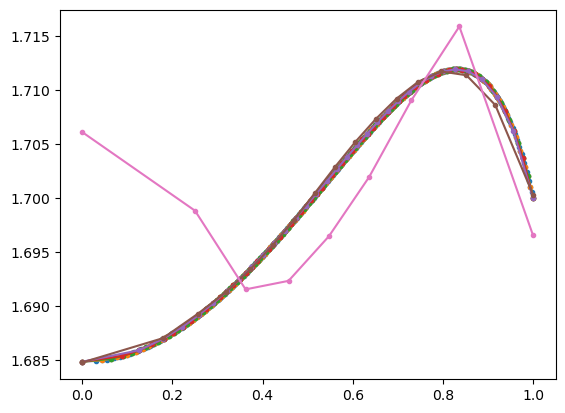

  0.018440 seconds (196.35 k allocations: 8.986 MiB)
17
  0.012887 seconds (138.24 k allocations: 6.353 MiB)
9


In [7]:
PyPlot.figure()
for res in reverse(Vector{Int}(2.0.^collect(3:9).+1))
    try
        @time eq1=FUSE.finalize(eqactor,res)
        println(res)
        eqt = eq1.time_slice[1]
        PyPlot.plot(eqt.profiles_1d.rho_tor_norm,eqt.profiles_1d.elongation,".-")
#        PyPlot.axvline(0.95,color="r")
#        PyPlot.plot(0.95,eqt.global_quantities.q_95,"or")
    catch
        rethrow()
    end
end